# Statistically Backed Investment Fund Evaluation (SBIFE)	


# Project Description
The purpose of this project is to compare and contrast two mutual funds based on their monthly returns using various statistical methods.  The two funds randomly selected for this project for Group 1 are HFSAX and KMKCX mutual funds.  Through Statistical methods we aim to find if there is a statistically significant difference between the returns and also correlation between the returns of the two funds.

# Steps Performed:
As the first step, we randomly selected two mutual funds for our project by getting a list of all of the mutual funds on Yahoo with a star rating of 5. Once we identified our two mutual funds, the raw data from Yahoo Finance was gathered for date range of 1/1/2020 to 12/31/2022.  This data was then parsed and cleaned so that only the last day of each month remains.  Using the clean data, the monthly return was calculated using current month and previous months return.  

Using Microsoft Excel’s descriptive statistics, mean was calculated for each fund and the coefficient of variation was calculated to measure risk of each fund.  Additionally, null and alternative hypothesis was setup in order to test whether the difference in the mean monthly return of the two funds is zero or not.  Using Excel’s t-Test: Paired Two Sample for Means statistical package, testing was performed to test the hypothesis.  Once all tests were performed, the results were analyzed and conclusions drawn.

# Result Description
'- Using description statistics, Excel provided mean based on calculated monthly return for each mutual fund as well as various other metrics.  
- The mean for HFSAX fund was 0.86 and the mean for KMKCX fund was 1.92.  The mean values indicate KMKCX fund is a much better investment.  
- However, a single statistic does not tell the whole story.  
- The coefficient of variation was then calculate to analyze risk of each fund.  
- This value was 274.93 for HFSAX fund and 475.91 for KMKCX fund.  Using the risk metric, it can be determined that the KMKCX fund is more risky.  
- Line and box plot charts were used to show the volatility of each fund.

- For hypothesis testing, the null hypothesis was                                                    and alternative hypothesis was                                                        .  
- The test used a significance level of 0.05 and t-test statistic.  
- The decision rule would be to reject null hypothesis if |t| > 2.032 or when p < 0.05 or if mean is not within confidence interval.   
- The calculated t value was -0.737, p value was 0.4664 and confidence interval was [-3.9885, 1.8664].  
- Using the decision rules above, it was determined that the null hypothesis should not be rejected.  

# Recommendations:
My recommendation on the two mutual funds for investors:
For risk averse investors, we recommend HFSAX fund
For investors with healthy risk appetite, we recommend KMKCX fund
For risk embracing Investors, we recommend a mix of HFSAX and KMKCX funds


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import calendar
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV files for both the funds

In [2]:
KMKCX=pd.read_csv("KMKCX.CSV")
HFSAX=pd.read_csv("HFSAX.CSV")

In [3]:
KMKCX[["year", "month", "day"]] = KMKCX["Date"].str.split("-", expand = True)

KMKCX["month_year"]=KMKCX["year"]+"-"+KMKCX["month"]
KMKCX
a=KMKCX.groupby(KMKCX["month_year"])["day"].max()
a=a.add_suffix('-').reset_index()
a["Date"]=a["month_year"]+a["day"]
a=a.drop(["month_year","day"],axis=1)
a

,Date
0,2020-01-31
1,2020-02-28
2,2020-03-31
3,2020-04-30
4,2020-05-29
5,2020-06-30
6,2020-07-31
7,2020-08-31
8,2020-09-30
9,2020-10-30


In [4]:
HFSAX.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Cleaning Data and Adding Monthly Return Column

# Finding Last Working Day For Each Month

In [5]:
HFSAX_cleaned = pd.merge(HFSAX, a, on='Date', how='right')
HFSAX_cleaned=HFSAX_cleaned.drop(['Open', 'High', 'Low','Close','Volume'], axis=1)
HFSAX_cleaned["Adj Close"].dtypes
HFSAX_cleaned["Monthly_return"]=HFSAX_cleaned["Adj Close"].pct_change()*100
HFSAX_cleaned=HFSAX_cleaned.drop(index=0)
print(HFSAX_cleaned)


          Date  Adj Close  Monthly_return
1   2020-02-28  17.257030        1.095541
2   2020-03-31  17.444038        1.083663
3   2020-04-30  17.877893        2.487125
4   2020-05-29  18.394033        2.887029
5   2020-06-30  18.962536        3.090693
6   2020-07-31  19.927494        5.088760
7   2020-08-31  20.840088        4.579572
8   2020-09-30  20.383791       -2.189516
9   2020-10-30  20.850992        2.292022
10  2020-11-30  22.148272        6.221670
11  2020-12-31  23.127676        4.422033
12  2021-01-29  23.299500        0.742937
13  2021-02-26  24.029757        3.134217
14  2021-03-31  24.029757        0.000000
15  2021-04-30  24.974794        3.932778
16  2021-05-28  25.369995        1.582399
17  2021-06-30  25.533226        0.643402
18  2021-07-30  24.908539       -2.446565
19  2021-08-31  25.054655        0.586610
20  2021-09-30  24.822592       -0.926227
21  2021-10-29  25.159285        1.356397
22  2021-11-30  25.125383       -0.134749
23  2021-12-31  25.220230        0

In [6]:
KMKCX_cleaned = pd.merge(KMKCX, a, on='Date', how='right')
KMKCX_cleaned=KMKCX_cleaned.drop(['Open', 'High', 'Low','Close','Volume'], axis=1)

KMKCX_cleaned["Adj Close"].dtypes
KMKCX_cleaned["Monthly_return"]=KMKCX_cleaned["Adj Close"].pct_change()*100
KMKCX_cleaned=KMKCX_cleaned.drop(index=0)
print(KMKCX_cleaned)


          Date  Adj Close  year month day month_year  Monthly_return
1   2020-02-28  23.913269  2020    02  28    2020-02       -4.405978
2   2020-03-31  19.327433  2020    03  31    2020-03      -19.176952
3   2020-04-30  22.368256  2020    04  30    2020-04       15.733196
4   2020-05-29  22.860296  2020    05  29    2020-05        2.199724
5   2020-06-30  22.624117  2020    06  30    2020-06       -1.033141
6   2020-07-31  22.781570  2020    07  31    2020-07        0.695952
7   2020-08-31  23.204729  2020    08  31    2020-08        1.857462
8   2020-09-30  21.521944  2020    09  30    2020-09       -7.251905
9   2020-10-30  21.964779  2020    10  30    2020-10        2.057598
10  2020-11-30  25.891279  2020    11  30    2020-11       17.876346
11  2020-12-31  29.315897  2020    12  31    2020-12       13.226917
12  2021-01-29  30.644411  2021    01  29    2021-01        4.531719
13  2021-02-26  35.663246  2021    02  26    2021-02       16.377652
14  2021-03-31  42.689613  2021   

# Descriptive Statistics

In [7]:
details_of_HFSAX=HFSAX_cleaned["Monthly_return"].describe(include='all')
details_of_HFSAX

count    35.000000
mean      0.862403
std       2.371001
min      -3.251421
25%      -0.898523
50%       0.643402
75%       2.389573
max       6.221670
Name: Monthly_return, dtype: float64

In [8]:
details_of_KMKCX=KMKCX_cleaned["Monthly_return"].describe(include='all')
details_of_KMKCX

count    35.000000
mean      1.923475
std       9.154104
min     -19.176952
25%      -3.845963
50%       0.695952
75%       6.724080
max      19.701984
Name: Monthly_return, dtype: float64

# Coefficient Of Variation

In [9]:
cv_HFSAX=(details_of_HFSAX["std"]/details_of_HFSAX["mean"])*100
print(f'Coefficient Of Variance for Mutuual fund HFSAX is {cv_HFSAX:.2f}')

Coefficient Of Variance for Mutuual fund HFSAX is 274.93


In [10]:
cv_KMKCX=(details_of_KMKCX["std"]/details_of_KMKCX["mean"])*100
print(f'Coefficient Of Variance for Mutuual fund KMKCX is {cv_KMKCX:.2f}')


Coefficient Of Variance for Mutuual fund KMKCX is 475.91


# Monthly Return Comparison Graph

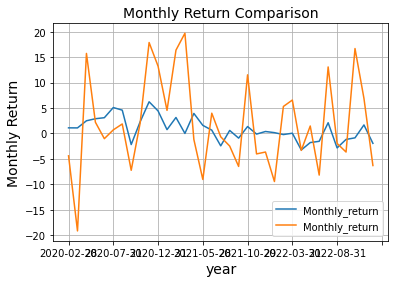

In [11]:
ax = plt.gca()
HFSAX_cleaned.plot('Date', 'Monthly_return', ax=ax)
KMKCX_cleaned.plot( 'Date' , 'Monthly_return',ax=ax)

plt.title('Monthly Return Comparison', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Monthly Return', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 720x504 with 0 Axes>

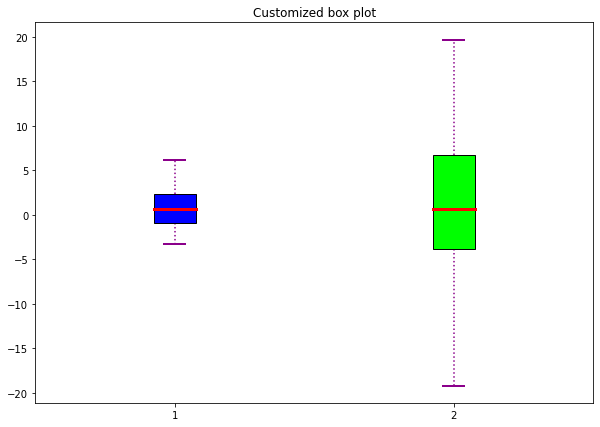

In [12]:
data_1 = HFSAX_cleaned['Monthly_return']
data_2 = KMKCX_cleaned['Monthly_return']
data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                vert = 1)
 
colors = ['#0000FF', '#00FF00']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
#ax.set_yticklabels(['HFSAX', 'KMKCX'])
 
# Adding title
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

# Hypothesis Testing

Null Hypothesis:
    H0: Ud=0
Alternate Hypothesis:
    Ha: udnot equals to 0

The Level Of Significance : 0.05

In [13]:
from scipy import stats

In [14]:
stats.shapiro(KMKCX_cleaned["Monthly_return"])

# stats.ttest_rel(a,b)

ShapiroResult(statistic=0.9594188928604126, pvalue=0.21965213119983673)

In [15]:
stats.shapiro(HFSAX_cleaned["Monthly_return"])

ShapiroResult(statistic=0.9815442562103271, pvalue=0.8082284331321716)

In [16]:
stats.ttest_rel(HFSAX_cleaned["Monthly_return"], KMKCX_cleaned["Monthly_return"])

Ttest_relResult(statistic=-0.7366008316108282, pvalue=0.46641759233011104)

Since p value of 0.4664 which is not less than alpha value of 0.05, we do not reject null hypothesis.

# Are Two Returns Correlated

In [17]:
Correlation_coefficient=HFSAX_cleaned["Monthly_return"].corr(KMKCX_cleaned["Monthly_return"])
Correlation_coefficient

0.3868580276215217

Text(0, 0.5, 'y axis')

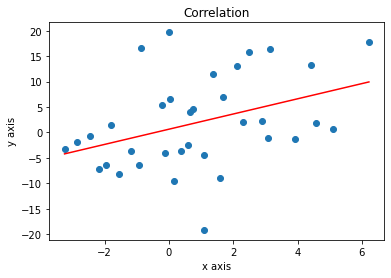

In [19]:
plt.title('Correlation')
 
# plot the data
plt.scatter(HFSAX_cleaned["Monthly_return"], KMKCX_cleaned["Monthly_return"])
 
# fits the best fitting line to the data
plt.plot(np.unique(HFSAX_cleaned["Monthly_return"]), 
         np.poly1d(np.polyfit(HFSAX_cleaned["Monthly_return"], KMKCX_cleaned["Monthly_return"], 1))
         (np.unique(HFSAX_cleaned["Monthly_return"])), color='red')
 
# Labelling axes
plt.xlabel('x axis')
plt.ylabel('y axis')

# Conclusion: Our two funds are are positively correlated but the correlation is weak due to the correlation coefficient being 0.39.